# Module 04: The Neuron - Building Block of Neural Networks

**Understanding the Fundamental Unit**

---

## Objectives

By the end of this notebook, you will:
- Understand the biological inspiration for artificial neurons
- Master the mathematical model of a neuron
- Implement a neuron from scratch in NumPy and PyTorch
- Understand how neurons process information

**Prerequisites:**
- [Module 01 - Python & Math Prerequisites](../01_python_math_prerequisites/01_prerequisites.ipynb)
- [Module 03 - PyTorch Fundamentals](../03_pytorch_fundamentals/03_pytorch_fundamentals.ipynb)

---

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')
np.random.seed(42)

---

# Part 1: Biological Inspiration

---

## 1.1 The Biological Neuron

The artificial neuron is inspired by biological neurons in our brains.

### Structure of a Biological Neuron:

1. **Dendrites**: Receive signals from other neurons
2. **Cell Body (Soma)**: Processes the incoming signals
3. **Axon**: Transmits the output signal
4. **Synapses**: Connections to other neurons

### How It Works:

1. Dendrites receive electrical signals from other neurons
2. Signals are accumulated in the cell body
3. If the accumulated signal exceeds a threshold, the neuron "fires"
4. The signal travels down the axon to other neurons

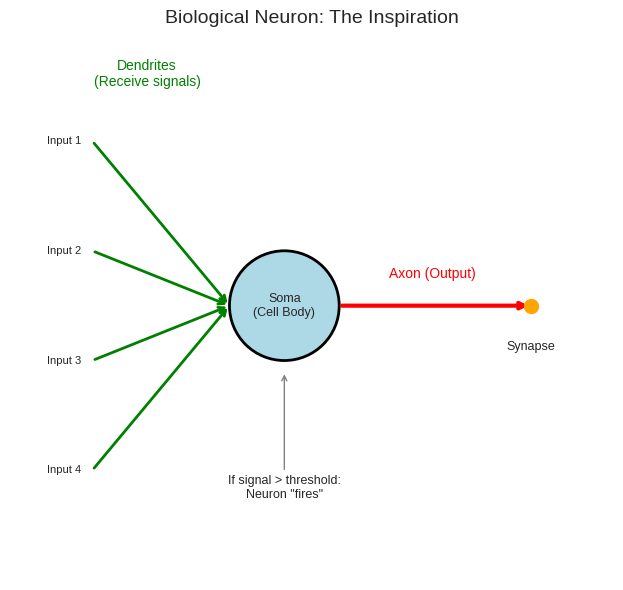

In [2]:
# Visualization: Biological Neuron
fig, ax = plt.subplots(figsize=(12, 6))

# Cell body (soma)
soma = plt.Circle((0.4, 0.5), 0.1, color='lightblue', ec='black', linewidth=2)
ax.add_patch(soma)
ax.text(0.4, 0.5, 'Soma\n(Cell Body)', ha='center', va='center', fontsize=9)

# Dendrites (inputs)
dendrite_ends = [(0.05, 0.8), (0.05, 0.6), (0.05, 0.4), (0.05, 0.2)]
for i, (x, y) in enumerate(dendrite_ends):
    ax.annotate('', xy=(0.3, 0.5), xytext=(x, y),
                arrowprops=dict(arrowstyle='->', color='green', lw=2))
    ax.text(x-0.02, y, f'Input {i+1}', ha='right', va='center', fontsize=8)

ax.text(0.15, 0.9, 'Dendrites\n(Receive signals)', ha='center', fontsize=10, color='green')

# Axon (output)
ax.annotate('', xy=(0.85, 0.5), xytext=(0.5, 0.5),
            arrowprops=dict(arrowstyle='->', color='red', lw=3))
ax.text(0.67, 0.55, 'Axon (Output)', ha='center', fontsize=10, color='red')

# Synapse
ax.scatter([0.85], [0.5], s=100, c='orange', zorder=5)
ax.text(0.85, 0.42, 'Synapse', ha='center', fontsize=9)

# Threshold annotation
ax.annotate('If signal > threshold:\nNeuron "fires"', xy=(0.4, 0.38),
            xytext=(0.4, 0.15), fontsize=9, ha='center',
            arrowprops=dict(arrowstyle='->', color='gray'))

ax.set_xlim(-0.1, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title('Biological Neuron: The Inspiration', fontsize=14)
plt.tight_layout()
plt.show()

## 1.2 From Biology to Mathematics

We abstract the biological neuron into a mathematical model:

| Biological | Mathematical |
|------------|-------------|
| Dendrites receive signals | Inputs $x_1, x_2, ..., x_n$ |
| Synaptic strength | Weights $w_1, w_2, ..., w_n$ |
| Signal accumulation | Weighted sum $\sum w_i x_i$ |
| Firing threshold | Bias $b$ |
| Fire or not | Activation function $f$ |
| Axon output | Output $y$ |

---

# Part 2: Mathematical Model of a Neuron

---

## 2.1 The Artificial Neuron

An artificial neuron computes:

$$z = \sum_{i=1}^{n} w_i x_i + b = \mathbf{w}^T \mathbf{x} + b$$

$$y = f(z)$$

Where:
- $\mathbf{x} = [x_1, x_2, ..., x_n]$ are the **inputs**
- $\mathbf{w} = [w_1, w_2, ..., w_n]$ are the **weights**
- $b$ is the **bias**
- $z$ is the **pre-activation** (weighted sum)
- $f$ is the **activation function**
- $y$ is the **output**

<>:20: SyntaxWarning: invalid escape sequence '\S'
<>:20: SyntaxWarning: invalid escape sequence '\S'
/tmp/ipython-input-584310619.py:20: SyntaxWarning: invalid escape sequence '\S'
  ax.text(0.5, 0.55, '$\Sigma$', ha='center', va='center', fontsize=16)


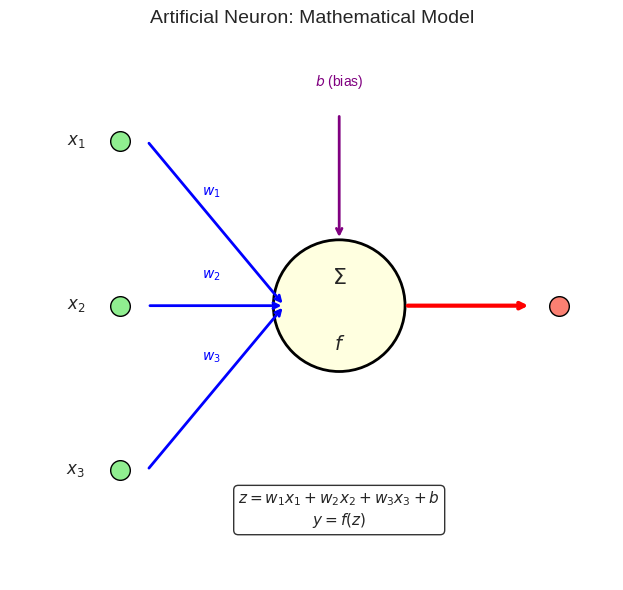

In [3]:
# Visualization: Artificial Neuron
fig, ax = plt.subplots(figsize=(12, 6))

# Inputs
input_y = [0.8, 0.5, 0.2]
for i, y in enumerate(input_y):
    ax.scatter([0.1], [y], s=200, c='lightgreen', edgecolors='black', zorder=5)
    ax.text(0.02, y, f'$x_{i+1}$', ha='center', va='center', fontsize=12)

# Weights on edges
for i, y in enumerate(input_y):
    ax.annotate('', xy=(0.4, 0.5), xytext=(0.15, y),
                arrowprops=dict(arrowstyle='->', color='blue', lw=2))
    mid_y = (y + 0.5) / 2
    ax.text(0.25, mid_y + 0.05, f'$w_{i+1}$', fontsize=10, color='blue')

# Neuron body
neuron = plt.Circle((0.5, 0.5), 0.12, color='lightyellow', ec='black', linewidth=2)
ax.add_patch(neuron)
ax.text(0.5, 0.55, '$\Sigma$', ha='center', va='center', fontsize=16)
ax.text(0.5, 0.43, '$f$', ha='center', va='center', fontsize=14)

# Bias
ax.annotate('', xy=(0.5, 0.62), xytext=(0.5, 0.85),
            arrowprops=dict(arrowstyle='->', color='purple', lw=2))
ax.text(0.5, 0.9, '$b$ (bias)', ha='center', fontsize=10, color='purple')

# Output
ax.annotate('', xy=(0.85, 0.5), xytext=(0.62, 0.5),
            arrowprops=dict(arrowstyle='->', color='red', lw=3))
ax.scatter([0.9], [0.5], s=200, c='salmon', edgecolors='black', zorder=5)
ax.text(0.9, 0.5, '$y$', ha='center', va='center', fontsize=12)

# Equations
ax.text(0.5, 0.1, '$z = w_1 x_1 + w_2 x_2 + w_3 x_3 + b$\n$y = f(z)$',
        ha='center', fontsize=11, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

ax.set_xlim(-0.1, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title('Artificial Neuron: Mathematical Model', fontsize=14)
plt.tight_layout()
plt.show()

## 2.2 Understanding Each Component

### Weights ($w_i$)

- Determine the **importance** of each input
- Positive weight: input increases output
- Negative weight: input decreases output
- Zero weight: input is ignored

### Bias ($b$)

- Acts as a **threshold adjustment**
- Allows the neuron to shift its activation
- Can fire even when all inputs are zero (if $b$ is large enough)

### Activation Function ($f$)

- Introduces **non-linearity**
- Without it, the network would just be a linear function
- Common choices: sigmoid, ReLU, tanh (covered in Module 05)

## 2.3 Why Do We Need Bias?

Without bias, the neuron's decision boundary must pass through the origin.

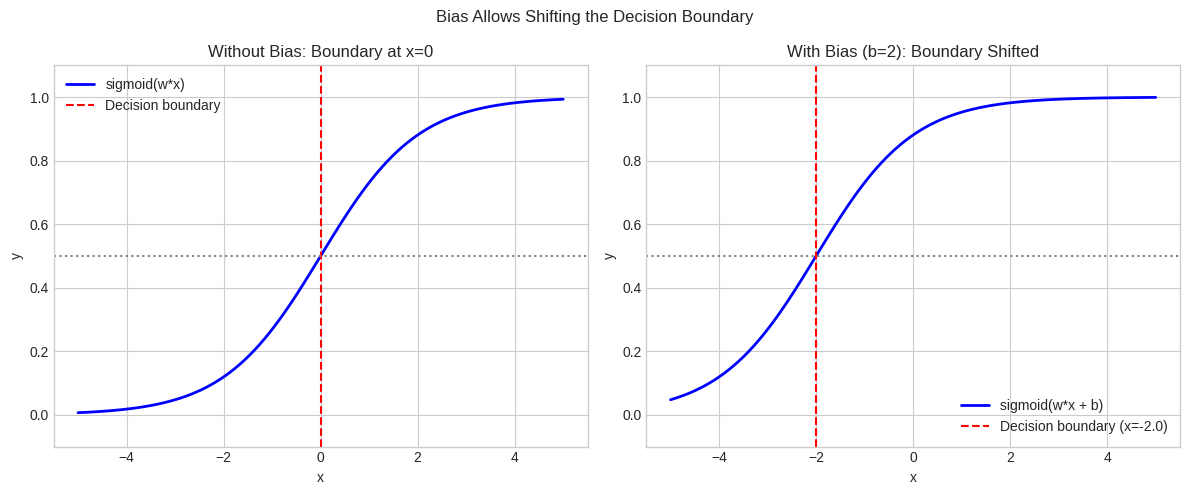

In [4]:
# Visualization: Effect of bias
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

x = np.linspace(-5, 5, 100)

# Without bias: z = w*x, decision boundary at x=0
ax = axes[0]
w = 1
z_no_bias = w * x
y_no_bias = 1 / (1 + np.exp(-z_no_bias))  # sigmoid

ax.plot(x, y_no_bias, 'b-', linewidth=2, label='sigmoid(w*x)')
ax.axvline(x=0, color='red', linestyle='--', label='Decision boundary')
ax.axhline(y=0.5, color='gray', linestyle=':')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Without Bias: Boundary at x=0')
ax.legend()
ax.set_ylim(-0.1, 1.1)

# With bias: z = w*x + b, decision boundary shifted
ax = axes[1]
b = 2
z_with_bias = w * x + b
y_with_bias = 1 / (1 + np.exp(-z_with_bias))

ax.plot(x, y_with_bias, 'b-', linewidth=2, label='sigmoid(w*x + b)')
ax.axvline(x=-b/w, color='red', linestyle='--', label=f'Decision boundary (x={-b/w})')
ax.axhline(y=0.5, color='gray', linestyle=':')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(f'With Bias (b={b}): Boundary Shifted')
ax.legend()
ax.set_ylim(-0.1, 1.1)

plt.suptitle('Bias Allows Shifting the Decision Boundary', fontsize=12)
plt.tight_layout()
plt.show()

## 2.4 Geometric Interpretation

For a 2D input, the neuron computes:
$$z = w_1 x_1 + w_2 x_2 + b$$

The decision boundary (where $z = 0$) is a **line**:
$$w_1 x_1 + w_2 x_2 + b = 0$$

- **Weights** determine the line's orientation
- **Bias** shifts the line

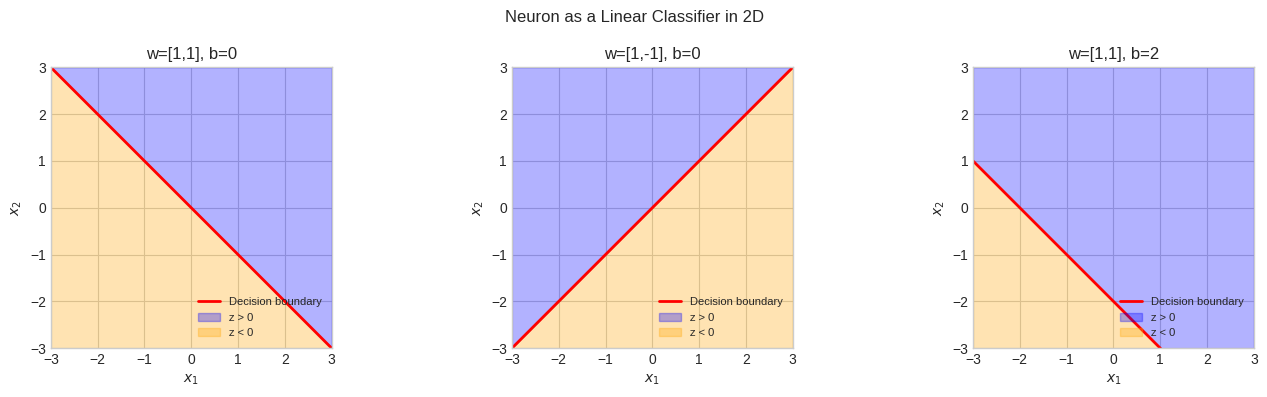

In [5]:
# Visualization: Decision boundary in 2D
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

x1 = np.linspace(-3, 3, 100)

# Different weight combinations
configs = [
    ([1, 1], 0, 'w=[1,1], b=0'),
    ([1, -1], 0, 'w=[1,-1], b=0'),
    ([1, 1], 2, 'w=[1,1], b=2')
]

for ax, (w, b, title) in zip(axes, configs):
    # Decision boundary: w1*x1 + w2*x2 + b = 0 => x2 = -(w1*x1 + b)/w2
    x2 = -(w[0] * x1 + b) / w[1]

    ax.plot(x1, x2, 'r-', linewidth=2, label='Decision boundary')

    # Fill positive and negative regions
    ax.fill_between(x1, x2, 3, alpha=0.3, color='blue', label='z > 0')
    ax.fill_between(x1, x2, -3, alpha=0.3, color='orange', label='z < 0')

    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_title(title)
    ax.legend(loc='lower right', fontsize=8)
    ax.set_aspect('equal')

plt.suptitle('Neuron as a Linear Classifier in 2D', fontsize=12)
plt.tight_layout()
plt.show()

---

# Part 3: Implementing a Neuron from Scratch

---

## 3.1 NumPy Implementation

In [6]:
def sigmoid(z):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-z))

class NeuronNumPy:
    """A single neuron implemented in NumPy."""

    def __init__(self, n_inputs):
        """Initialize weights and bias randomly."""
        # Random initialization (small values)
        self.weights = np.random.randn(n_inputs) * 0.01
        self.bias = 0.0

    def forward(self, x):
        """Compute the output for input x."""
        # Step 1: Weighted sum
        z = np.dot(self.weights, x) + self.bias

        # Step 2: Activation
        y = sigmoid(z)

        return y

    def __repr__(self):
        return f"NeuronNumPy(weights={self.weights}, bias={self.bias:.4f})"

In [7]:
# Test the NumPy neuron
neuron = NeuronNumPy(n_inputs=3)
print(f"Neuron: {neuron}")

# Single input
x = np.array([1.0, 2.0, 3.0])
output = neuron.forward(x)
print(f"\nInput: {x}")
print(f"Output: {output:.4f}")

Neuron: NeuronNumPy(weights=[ 0.00496714 -0.00138264  0.00647689], bias=0.0000)

Input: [1. 2. 3.]
Output: 0.5054


In [8]:
# Let's trace through the calculation
print("Step-by-step calculation:")
print(f"Weights: {neuron.weights}")
print(f"Bias: {neuron.bias}")
print(f"Input: {x}")

z = np.dot(neuron.weights, x) + neuron.bias
print(f"\nz = w.x + b = {z:.4f}")

y = sigmoid(z)
print(f"y = sigmoid(z) = {y:.4f}")

Step-by-step calculation:
Weights: [ 0.00496714 -0.00138264  0.00647689]
Bias: 0.0
Input: [1. 2. 3.]

z = w.x + b = 0.0216
y = sigmoid(z) = 0.5054


## 3.2 PyTorch Implementation

In [9]:
class NeuronPyTorch:
    """A single neuron implemented in PyTorch."""

    def __init__(self, n_inputs):
        """Initialize weights and bias with gradient tracking."""
        self.weights = torch.randn(n_inputs, requires_grad=True) * 0.01
        self.bias = torch.zeros(1, requires_grad=True)

    def forward(self, x):
        """Compute the output for input x."""
        z = torch.dot(self.weights, x) + self.bias
        y = torch.sigmoid(z)
        return y

    def __repr__(self):
        return f"NeuronPyTorch(weights={self.weights.data}, bias={self.bias.item():.4f})"

In [10]:
# Test the PyTorch neuron
neuron_pt = NeuronPyTorch(n_inputs=3)
print(f"Neuron: {neuron_pt}")

x_pt = torch.tensor([1.0, 2.0, 3.0])
output_pt = neuron_pt.forward(x_pt)
print(f"\nInput: {x_pt}")
print(f"Output: {output_pt.item():.4f}")

Neuron: NeuronPyTorch(weights=tensor([ 0.0124, -0.0117,  0.0073]), bias=0.0000)

Input: tensor([1., 2., 3.])
Output: 0.5027


## 3.3 Using PyTorch's nn.Linear

PyTorch provides `nn.Linear` which implements a linear layer (without activation). A single neuron is just a linear layer with one output.

In [11]:
import torch.nn as nn

# A single neuron using nn.Linear
class NeuronModule(nn.Module):
    def __init__(self, n_inputs):
        super().__init__()
        # Linear layer: n_inputs -> 1 output
        self.linear = nn.Linear(n_inputs, 1)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        z = self.linear(x)
        y = self.activation(z)
        return y

In [12]:
# Test the nn.Module neuron
neuron_module = NeuronModule(n_inputs=3)

print("Neuron parameters:")
for name, param in neuron_module.named_parameters():
    print(f"  {name}: {param.data}")

x_pt = torch.tensor([1.0, 2.0, 3.0])
output = neuron_module(x_pt)
print(f"\nInput: {x_pt}")
print(f"Output: {output.item():.4f}")

Neuron parameters:
  linear.weight: tensor([[ 0.2902, -0.4561,  0.3231]])
  linear.bias: tensor([-0.5769])

Input: tensor([1., 2., 3.])
Output: 0.4429


## 3.4 Processing Multiple Inputs (Batch Processing)

In [13]:
# Batch of inputs
batch_size = 4
n_features = 3

X = torch.randn(batch_size, n_features)
print(f"Batch input shape: {X.shape}")
print(f"Input batch:\n{X}")

# Process entire batch at once
outputs = neuron_module(X)
print(f"\nOutput shape: {outputs.shape}")
print(f"Outputs: {outputs.squeeze()}")

Batch input shape: torch.Size([4, 3])
Input batch:
tensor([[-0.4726,  0.9027, -0.0255],
        [-0.8043,  1.2152,  0.4969],
        [-1.5093, -0.2517, -0.8122],
        [-0.4208, -0.2528,  1.4654]])

Output shape: torch.Size([4, 1])
Outputs: tensor([0.2434, 0.2308, 0.2382, 0.4725], grad_fn=<SqueezeBackward0>)


---

# Part 4: Learning in a Neuron

---

## 4.1 How Does a Neuron Learn?

Learning means finding the best weights and bias. We:
1. Make a prediction
2. Compute the error (loss)
3. Compute gradients (how to adjust weights)
4. Update weights in the direction that reduces error

In [14]:
# Simple training example
# Task: Learn to output 1 for [1, 0] and 0 for [0, 1]

# Training data
X_train = torch.tensor([[1.0, 0.0],
                        [0.0, 1.0]])
y_train = torch.tensor([[1.0], [0.0]])

# Create neuron
neuron = NeuronModule(n_inputs=2)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(neuron.parameters(), lr=1.0)

# Before training
print("Before training:")
with torch.no_grad():
    predictions = neuron(X_train)
    print(f"Predictions: {predictions.squeeze().tolist()}")
    print(f"Targets: {y_train.squeeze().tolist()}")

Before training:
Predictions: [0.5369951725006104, 0.4078187346458435]
Targets: [1.0, 0.0]


In [15]:
# Training loop
losses = []
n_epochs = 100

for epoch in range(n_epochs):
    # Forward pass
    predictions = neuron(X_train)
    loss = criterion(predictions, y_train)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if epoch % 20 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

# After training
print("\nAfter training:")
with torch.no_grad():
    predictions = neuron(X_train)
    print(f"Predictions: {predictions.squeeze().tolist()}")
    print(f"Targets: {y_train.squeeze().tolist()}")

Epoch 0: Loss = 0.1903
Epoch 20: Loss = 0.0372
Epoch 40: Loss = 0.0180
Epoch 60: Loss = 0.0115
Epoch 80: Loss = 0.0083

After training:
Predictions: [0.9192692637443542, 0.0807289183139801]
Targets: [1.0, 0.0]


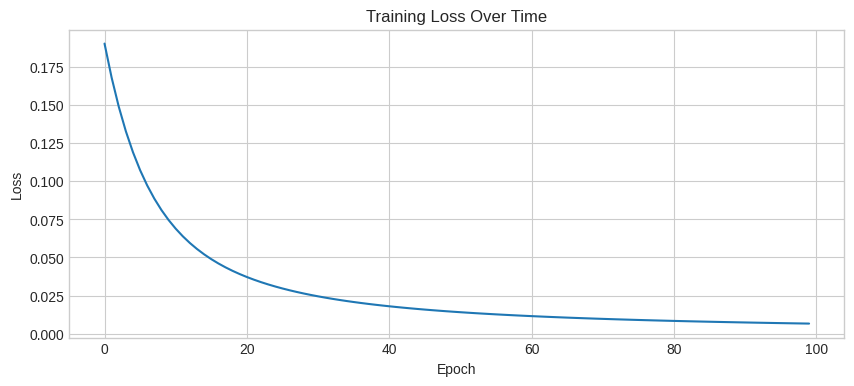

In [16]:
# Plot training loss
plt.figure(figsize=(10, 4))
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.grid(True)
plt.show()

## 4.2 What Did the Neuron Learn?

In [17]:
# Examine learned parameters
print("Learned parameters:")
for name, param in neuron.named_parameters():
    print(f"  {name}: {param.data}")

# The neuron learned:
# - Positive weight for x1 (first input important for output=1)
# - Negative weight for x2 (second input important for output=0)

Learned parameters:
  linear.weight: tensor([[ 2.5844, -2.2805]])
  linear.bias: tensor([-0.1520])


---

# Part 5: Limitations of a Single Neuron

---

## 5.1 A Single Neuron is a Linear Classifier

A single neuron can only learn **linearly separable** patterns.

In [18]:
# Example: AND gate (linearly separable - a single neuron can learn this)
X_and = torch.tensor([[0.0, 0.0],
                      [0.0, 1.0],
                      [1.0, 0.0],
                      [1.0, 1.0]])
y_and = torch.tensor([[0.0], [0.0], [0.0], [1.0]])

# Train neuron on AND
neuron_and = NeuronModule(2)
optimizer = torch.optim.SGD(neuron_and.parameters(), lr=5.0)

for _ in range(500):
    pred = neuron_and(X_and)
    loss = nn.MSELoss()(pred, y_and)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print("AND Gate:")
print("Input -> Prediction (Target)")
with torch.no_grad():
    for x, y in zip(X_and, y_and):
        pred = neuron_and(x)
        print(f"{x.tolist()} -> {pred.item():.2f} ({y.item()})")

AND Gate:
Input -> Prediction (Target)
[0.0, 0.0] -> 0.00 (0.0)
[0.0, 1.0] -> 0.05 (0.0)
[1.0, 0.0] -> 0.05 (0.0)
[1.0, 1.0] -> 0.94 (1.0)


In [19]:
# Example: XOR gate (NOT linearly separable - single neuron fails!)
X_xor = torch.tensor([[0.0, 0.0],
                      [0.0, 1.0],
                      [1.0, 0.0],
                      [1.0, 1.0]])
y_xor = torch.tensor([[0.0], [1.0], [1.0], [0.0]])

# Train neuron on XOR
neuron_xor = NeuronModule(2)
optimizer = torch.optim.SGD(neuron_xor.parameters(), lr=5.0)

for _ in range(500):
    pred = neuron_xor(X_xor)
    loss = nn.MSELoss()(pred, y_xor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print("XOR Gate (single neuron FAILS):")
print("Input -> Prediction (Target)")
with torch.no_grad():
    for x, y in zip(X_xor, y_xor):
        pred = neuron_xor(x)
        print(f"{x.tolist()} -> {pred.item():.2f} ({y.item()})")

XOR Gate (single neuron FAILS):
Input -> Prediction (Target)
[0.0, 0.0] -> 0.50 (0.0)
[0.0, 1.0] -> 0.50 (1.0)
[1.0, 0.0] -> 0.50 (1.0)
[1.0, 1.0] -> 0.50 (0.0)


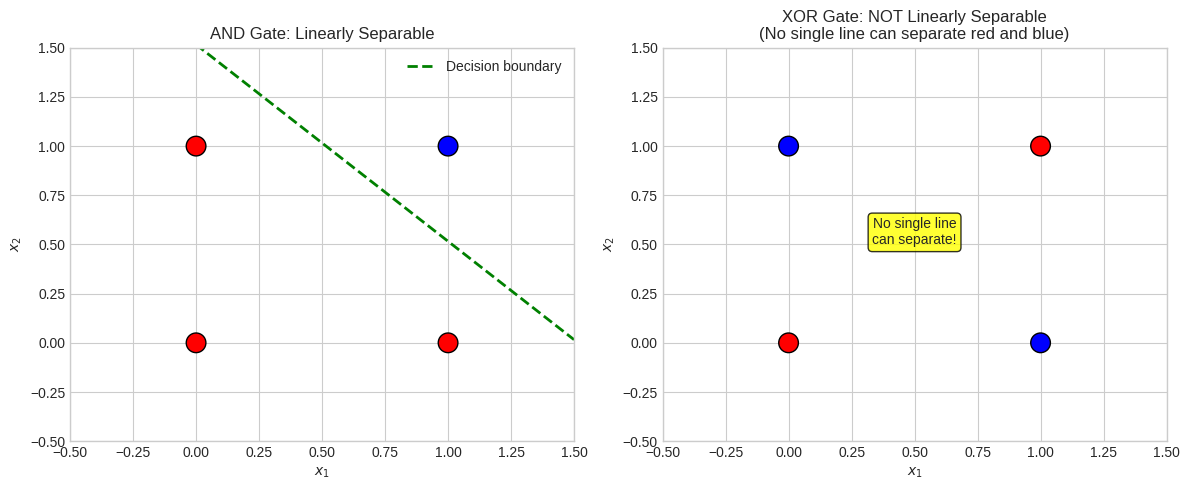

In [20]:
# Visualization: Why XOR fails
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# AND gate
ax = axes[0]
colors = ['red' if y == 0 else 'blue' for y in y_and]
ax.scatter(X_and[:, 0], X_and[:, 1], c=colors, s=200, edgecolors='black')

# Decision boundary for AND
w = neuron_and.linear.weight.data.squeeze().numpy()
b = neuron_and.linear.bias.data.item()
x_line = np.linspace(-0.5, 1.5, 100)
y_line = -(w[0] * x_line + b) / w[1]
ax.plot(x_line, y_line, 'g--', linewidth=2, label='Decision boundary')

ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('AND Gate: Linearly Separable')
ax.legend()

# XOR gate
ax = axes[1]
colors = ['red' if y == 0 else 'blue' for y in y_xor]
ax.scatter(X_xor[:, 0], X_xor[:, 1], c=colors, s=200, edgecolors='black')

ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('XOR Gate: NOT Linearly Separable\n(No single line can separate red and blue)')

ax.annotate('No single line\ncan separate!', xy=(0.5, 0.5), fontsize=10, ha='center',
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))

plt.tight_layout()
plt.show()

## 5.2 The Solution: Multiple Neurons (Neural Networks)

By combining multiple neurons in layers, we can learn non-linear patterns. This is the foundation of **deep learning**.

We'll explore this in detail in Module 06 (Perceptron) and beyond.

---

# Key Points Summary

---

## Biological Inspiration
- Artificial neurons are inspired by biological neurons
- Dendrites = inputs, synapses = weights, firing = activation

## Mathematical Model
- $z = \mathbf{w}^T \mathbf{x} + b$ (weighted sum + bias)
- $y = f(z)$ (apply activation function)
- Weights determine importance of inputs
- Bias shifts the decision boundary

## Implementation
- NumPy: Manual implementation for understanding
- PyTorch: Use nn.Linear + activation
- Batch processing: Handles multiple inputs efficiently

## Limitations
- Single neuron = linear classifier
- Cannot learn non-linear patterns (like XOR)
- Solution: Combine neurons into networks

---

# Interview Tips

---

## Common Questions

**Q: What is an artificial neuron?**
A: An artificial neuron computes a weighted sum of inputs plus a bias, then applies an activation function. Mathematically: y = f(w.x + b). It's the basic building block of neural networks.

**Q: Why do we need bias in a neuron?**
A: Bias allows the decision boundary to shift away from the origin. Without bias, the neuron's output would be zero when all inputs are zero, limiting what it can learn.

**Q: Why do we need activation functions?**
A: Without activation functions, a neural network would just compute a linear function regardless of depth. Activation functions introduce non-linearity, allowing networks to learn complex patterns.

**Q: Can a single neuron learn any function?**
A: No. A single neuron is a linear classifier and can only learn linearly separable patterns. For example, it cannot learn XOR. This is why we need multiple neurons organized in layers.

---

# Practice Exercises

---

## Exercise 1: Manual Calculation

Given: w = [0.5, -0.3, 0.8], b = 0.1, x = [1.0, 2.0, 0.5]

Calculate z and y (using sigmoid) by hand, then verify with code.

In [21]:
# Your calculation:
# z = 0.5*1.0 + (-0.3)*2.0 + 0.8*0.5 + 0.1 = ?
# y = sigmoid(z) = ?

# Verify with code
w = np.array([0.5, -0.3, 0.8])
b = 0.1
x = np.array([1.0, 2.0, 0.5])

# Your code here

## Exercise 2: Implement OR Gate

Train a single neuron to learn the OR gate:
- (0,0) -> 0
- (0,1) -> 1
- (1,0) -> 1
- (1,1) -> 1

In [22]:
# Your code here
X_or = torch.tensor([[0.0, 0.0],
                     [0.0, 1.0],
                     [1.0, 0.0],
                     [1.0, 1.0]])
y_or = torch.tensor([[0.0], [1.0], [1.0], [1.0]])

# Create and train neuron
# ...

## Solutions

In [23]:
# Exercise 1 Solution
print("Exercise 1:")
w = np.array([0.5, -0.3, 0.8])
b = 0.1
x = np.array([1.0, 2.0, 0.5])

z = np.dot(w, x) + b
y = 1 / (1 + np.exp(-z))

print(f"z = 0.5*1.0 + (-0.3)*2.0 + 0.8*0.5 + 0.1")
print(f"z = 0.5 - 0.6 + 0.4 + 0.1 = {z}")
print(f"y = sigmoid({z}) = {y:.4f}")

# Exercise 2 Solution
print("\nExercise 2:")
neuron_or = NeuronModule(2)
optimizer = torch.optim.SGD(neuron_or.parameters(), lr=5.0)

for _ in range(500):
    pred = neuron_or(X_or)
    loss = nn.MSELoss()(pred, y_or)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print("OR Gate:")
with torch.no_grad():
    for x, y in zip(X_or, y_or):
        pred = neuron_or(x)
        print(f"{x.tolist()} -> {pred.item():.2f} ({y.item()})")

Exercise 1:
z = 0.5*1.0 + (-0.3)*2.0 + 0.8*0.5 + 0.1
z = 0.5 - 0.6 + 0.4 + 0.1 = 0.4
y = sigmoid(0.4) = 0.5987

Exercise 2:
OR Gate:
[0.0, 0.0] -> 0.05 (0.0)
[0.0, 1.0] -> 0.97 (1.0)
[1.0, 0.0] -> 0.97 (1.0)
[1.0, 1.0] -> 1.00 (1.0)


---

## Next Module: [05 - Activation Functions](../05_activation_functions/05_activation_functions.ipynb)

Now that we understand the neuron, let's dive deep into activation functions - the key to non-linearity in neural networks.